In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dt = 600 #s

# barotropic APE (ssh contribution to PE)
EP_baro = np.load('PE_barotropic.npz')
EP_febTS = np.load('PE_febTS.npz')

# APE (using density anomaly)
APE_febTS = np.load('APE_febTS.npz')

KE_baro = np.load('KE_barotropic.npz')
KE_febTS = np.load('KE_febTS.npz')

# I got these from wind_and_kinetic_energy.ipynb
Ewind_SVB =        np.array([1967.336140,
                             13658.249842,
                             58381.587749,
                             203059.249746,
                             583040.490311,
                            1605971.282449,
                            4212949.908733,
                            9988163.429514,
                            22737647.608706,
                            49719098.402076,
                            100951667.449054,
                            195337257.246875,
                            361892444.111385,
                            631783365.147192,
                            1047506643.644784,
                            1656420482.996358,
                            2488822890.624424,
                            3552559954.569267,
                            4826334444.561691,
                            6249001678.690140,
                            7481331481.931970,
                            0.000000])

Ewind_noSVB =          np.array([1908.242113,
                                13250.440428,
                                56643.048604,
                                197022.699529,
                                565736.516323,
                                1558333.593194,
                                4088052.794804,
                                9692372.395526,
                                22064613.394391,
                                48247946.294462,
                                97966799.420028,
                                189564709.144951,
                                351202565.610907,
                                613133365.634483,
                                1016604312.240177,
                                1607583381.294032,
                                2415491252.341014,
                                3447959452.724622,
                                4684328563.799050,
                                6065263172.112794,
                                7261647121.061090,
                                0.000000])

Ewind_onlySVB =       np.array([57.999554,
                                399.526290,
                                1701.314444,
                                5902.245192,
                                16903.844723,
                                46522.982646,
                                121952.956161,
                                288711.758155,
                                656842.711860,
                                1435618.962636,
                                2912042.260602,
                                5630858.473472,
                                10426294.092496,
                                18186848.292017,
                                30130501.571881,
                                47611648.716257,
                                71482254.507949,
                                101949005.517322,
                                138389008.463340,
                                179037874.016783,
                                213991926.116055,
                                0.000000
                                ])

### Wind

In [3]:
# integrte the wind power input over the whole time it is applied (total energy input into the system)
tot_wind_energy_SVB = np.sum(Ewind_SVB*dt)
tot_wind_energy_noSVB = np.sum(Ewind_noSVB*dt)
tot_wind_energy_onlySVB = np.sum(Ewind_onlySVB*dt)

print('Total wind energy input [J] into SVB is %1.3e' %tot_wind_energy_SVB)
print('Total wind energy input [J] into noSVB is %1.3e' %tot_wind_energy_noSVB)
print('Total wind energy input [J] into the bay alone is %1.3e' %tot_wind_energy_onlySVB)

Total wind energy input [J] into SVB is 1.721e+13
Total wind energy input [J] into noSVB is 1.670e+13
Total wind energy input [J] into the bay alone is 4.934e+11


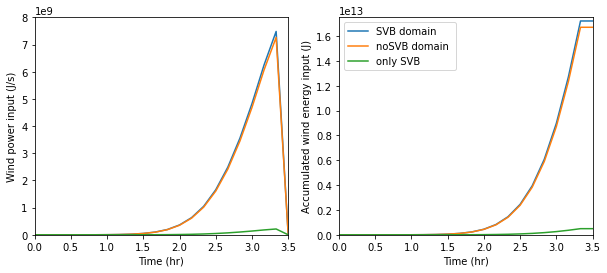

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharex=True)

ax1.plot((np.arange(len(Ewind_SVB))*600)/3600,Ewind_SVB, label='SVB domain')
ax1.plot((np.arange(len(Ewind_noSVB))*600)/3600,Ewind_noSVB, label='noSVB domain')
ax1.plot((np.arange(len(Ewind_onlySVB))*600)/3600,Ewind_onlySVB, label='only SVB ')
ax1.set_ylabel('Wind power input (J/s)')
ax1.set_xlabel('Time (hr)')
ax1.set_xlim(0,3.5)
ax1.set_ylim(0,8E9)

ax2.plot((np.arange(len(Ewind_SVB))*600)/3600,np.cumsum(Ewind_SVB*dt), label='SVB domain ')
ax2.plot((np.arange(len(Ewind_noSVB))*600)/3600,np.cumsum(Ewind_noSVB*dt), label='noSVB domain ')
ax2.plot((np.arange(len(Ewind_onlySVB))*600)/3600,np.cumsum(Ewind_onlySVB*dt), label='only SVB')
ax2.set_ylabel('Accumulated wind energy input (J)')
ax2.set_xlabel('Time (hr)')
ax2.set_ylim(0,1.75E13)
ax2.legend()

### barotropic APE (ssh) and APE

In [5]:
EP_SVB_baro = EP_baro['EpSVB'][:]
EP_noSVB_baro = EP_baro['EpnoSVB'][:]
EP_onlySVB_baro = EP_baro['Ep'][:]
EP_maskSVB_baro = EP_baro['Epsvbmask'][:]

EP_SVB = EP_febTS['EpSVB'][:]
EP_noSVB = EP_febTS['EpnoSVB'][:]
EP_onlySVB = EP_febTS['Ep'][:]
EP_maskSVB = EP_febTS['Epsvbmask'][:]

APE_SVB = APE_febTS['APESVB'][:]
APE_noSVB = APE_febTS['APEnoSVB'][:]
APE_onlySVB = APE_febTS['APE'][:]
APE_maskSVB = APE_febTS['APEsvbmask'][:]

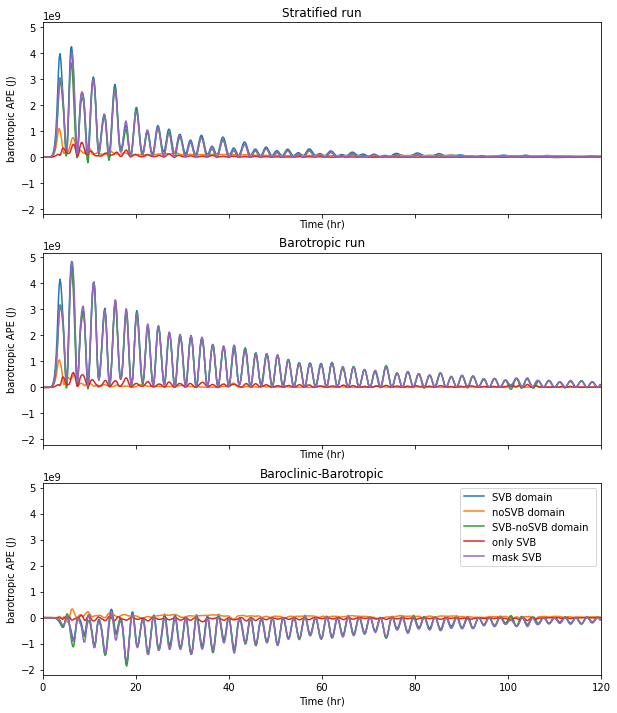

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,12), sharex=True, sharey=True)

ax1.plot((np.arange(len(EP_SVB))*600)/3600,EP_SVB, label='SVB domain')
ax1.plot((np.arange(len(EP_noSVB))*600)/3600,EP_noSVB, label='noSVB domain')
ax1.plot((np.arange(len(EP_SVB))*600)/3600,EP_SVB-EP_noSVB, label='SVB-noSVB domain')
ax1.plot((np.arange(len(EP_onlySVB))*600)/3600,EP_onlySVB, label='only SVB ')
ax1.plot((np.arange(len(EP_maskSVB))*600)/3600,EP_maskSVB, label='mask SVB ')

ax1.set_ylabel('barotropic APE (J)')
ax1.set_xlabel('Time (hr)')
#ax1.set_xlim(0,3.5)
#ax1.set_ylim(0,8E9)
ax1.set_title('Stratified run')

ax2.plot((np.arange(len(EP_SVB))*600)/3600,(EP_SVB_baro), label='SVB domain ')
ax2.plot((np.arange(len(EP_noSVB))*600)/3600,(EP_noSVB_baro), label='noSVB domain ')
ax2.plot((np.arange(len(EP_noSVB))*600)/3600,(EP_SVB_baro-EP_noSVB_baro), label='SVB-noSVB domain ')
ax2.plot((np.arange(len(EP_onlySVB))*600)/3600,(EP_onlySVB_baro), label='only SVB')
ax2.plot((np.arange(len(EP_maskSVB))*600)/3600,(EP_maskSVB_baro), label='mask SVB')

ax2.set_ylabel('barotropic APE (J)')
ax2.set_xlabel('Time (hr)')
ax2.set_title('Barotropic run')

ax3.plot((np.arange(len(EP_SVB))*600)/3600,(EP_SVB-EP_SVB_baro), label='SVB domain ')
ax3.plot((np.arange(len(EP_noSVB))*600)/3600,(EP_noSVB-EP_noSVB_baro), label='noSVB domain ')
ax3.plot((np.arange(len(EP_noSVB))*600)/3600,(EP_SVB-EP_SVB_baro-(EP_noSVB-EP_noSVB_baro)), label='SVB-noSVB domain ')
ax3.plot((np.arange(len(EP_onlySVB))*600)/3600,(EP_onlySVB-EP_onlySVB_baro), label='only SVB')
ax3.plot((np.arange(len(EP_maskSVB))*600)/3600,(EP_maskSVB-EP_maskSVB_baro), label='mask SVB')

ax3.set_ylabel('barotropic APE (J)')
ax3.set_xlabel('Time (hr)')
ax3.set_title('Baroclinic-Barotropic')
ax3.set_xlim(0,120)
ax3.legend()

Each of these lines tells us about different contributions. EP on the whole domain with SVB (blue) is much larger than EP on the whole domain without the bay (orange). The difference between them is the green line, which is similar to calculating EP using the difference in SSH between the run with the bay and without the bay and keeping the contribution of the bay by using the land mask of the run with bay (purple), while omitting the SSH contribution at the bay by using the noSVB mask gives a much smaller EP (red). 

So, the wind blows and a small fraction goes into moving the SSH, reflected here as SSH EP. The effect of the bay (SVB-noSVB) is the blue line, and from that, the largest portion is going into the seiche in the bay (green), and the rest is the effect over the domain(orange):

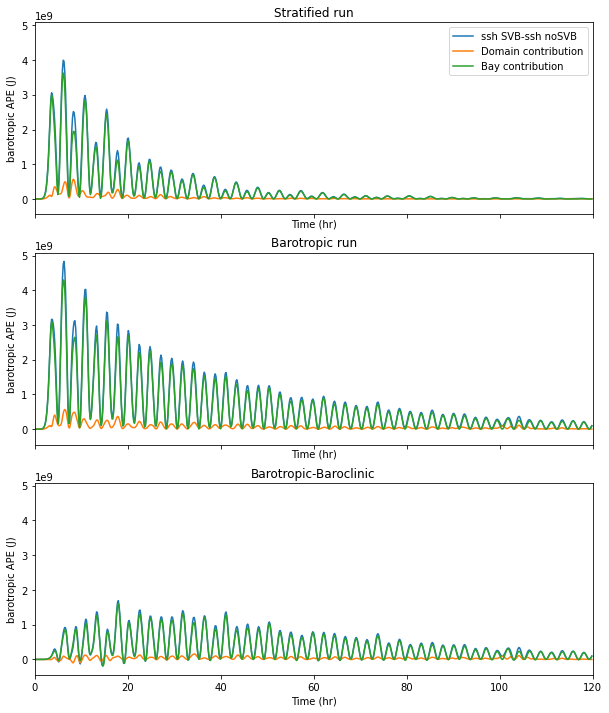

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,12), sharex=True, sharey=True)

ax1.plot((np.arange(len(EP_SVB))*600)/3600,EP_maskSVB, label='ssh SVB-ssh noSVB')
ax1.plot((np.arange(len(EP_onlySVB))*600)/3600,EP_onlySVB, label='Domain contribution')
ax1.plot((np.arange(len(EP_maskSVB))*600)/3600,EP_maskSVB-EP_onlySVB, label='Bay contribution')

ax1.set_ylabel('barotropic APE (J)')
ax1.set_xlabel('Time (hr)')
#ax1.set_xlim(0,3.5)
#ax1.set_ylim(0,8E9)
ax1.set_title('Stratified run')

ax2.plot((np.arange(len(EP_SVB))*600)/3600,EP_maskSVB_baro, label='ssh SVB-ssh noSVB')
ax2.plot((np.arange(len(EP_onlySVB))*600)/3600,EP_onlySVB_baro, label='Domain contrib.')
ax2.plot((np.arange(len(EP_maskSVB))*600)/3600,EP_maskSVB_baro-EP_onlySVB_baro, label='Bay contrib.')

ax2.set_ylabel('barotropic APE (J)')
ax2.set_xlabel('Time (hr)')
ax2.set_title('Barotropic run')

ax3.plot((np.arange(len(EP_SVB))*600)/3600,(EP_maskSVB_baro-EP_maskSVB), label='SVB-noSVB')
ax3.plot((np.arange(len(EP_onlySVB))*600)/3600,EP_onlySVB_baro-(EP_onlySVB), label='domain')
ax3.plot((np.arange(len(EP_maskSVB))*600)/3600,(EP_maskSVB_baro-EP_onlySVB_baro)-(EP_maskSVB-EP_onlySVB), label='bay')


ax3.set_ylabel('barotropic APE (J)')
ax3.set_xlabel('Time (hr)')
ax3.set_title('Barotropic-Baroclinic')
ax3.set_xlim(0,120)
ax1.legend()

In comparison to EP, APE is huge. But this is expected and I will not look into it because there is no way to compare to the barotropic run.

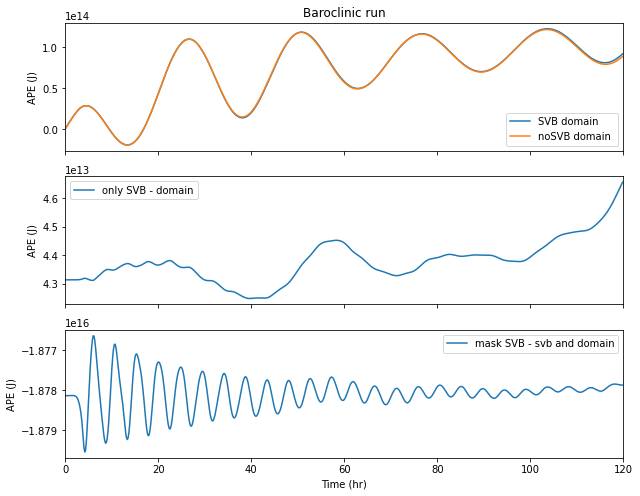

In [23]:
fig, (ax,ax2,ax3) = plt.subplots(3,1, figsize=(10,8), sharex=True)

ax.plot((np.arange(len(APE_SVB))*600)/3600,(APE_SVB), label='SVB domain ')
ax.plot((np.arange(len(APE_noSVB))*600)/3600,(APE_noSVB), label='noSVB domain ')
ax2.plot((np.arange(len(APE_onlySVB))*600)/3600,(APE_onlySVB), label='only SVB - domain')
ax3.plot((np.arange(len(APE_maskSVB))*600)/3600,(APE_maskSVB), label='mask SVB - svb and domain')

ax.set_ylabel('APE (J)')
ax2.set_ylabel('APE (J)')
ax3.set_ylabel('APE (J)')
ax3.set_xlabel('Time (hr)')
ax.set_title('Baroclinic run')
ax.set_xlim(0,120)
ax.legend()
ax2.legend()
ax3.legend()

### Kinetic energy

In [24]:
KE_SVB_baro = KE_baro['KSVB'][:]
KE_noSVB_baro = KE_baro['KnoSVB'][:]
KE_onlySVB_baro = KE_baro['K'][:]
KE_maskSVB_baro = KE_baro['K_svbmask'][:]

KE_SVB = KE_febTS['KSVB'][:]
KE_noSVB = KE_febTS['KnoSVB'][:]
KE_onlySVB = KE_febTS['K'][:]
KE_maskSVB = KE_febTS['K_svbmask'][:]

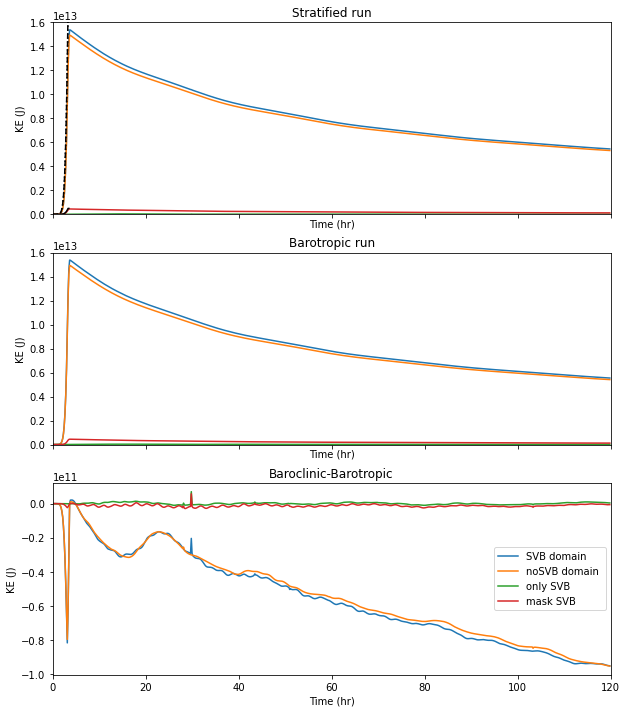

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,12), sharex=True)

ax1.plot((np.arange(len(KE_SVB))*600)/3600,KE_SVB, label='SVB domain')
ax1.plot((np.arange(len(KE_noSVB))*600)/3600,KE_noSVB, label='noSVB domain')
ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_onlySVB, label='only SVB ')
ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB, label='mask SVB ')

ax1.plot((np.arange(len(Ewind_SVB))*600)/3600,np.cumsum(Ewind_SVB*dt),'k--' ,label='wind SVB domain ')
ax1.plot((np.arange(len(Ewind_noSVB))*600)/3600,np.cumsum(Ewind_noSVB*dt), 'k:',label='wind noSVB domain ')
ax1.plot((np.arange(len(Ewind_onlySVB))*600)/3600,np.cumsum(Ewind_onlySVB*dt), 'k-',label='wind only SVB')


ax1.set_ylabel('KE (J)')
ax1.set_xlabel('Time (hr)')
ax1.set_ylim(0,1.6E13)
ax1.set_title('Stratified run')

ax2.plot((np.arange(len(KE_SVB))*600)/3600,(KE_SVB_baro), label='SVB domain ')
ax2.plot((np.arange(len(KE_noSVB))*600)/3600,(KE_noSVB_baro), label='noSVB domain ')
ax2.plot((np.arange(len(KE_onlySVB))*600)/3600,(KE_onlySVB_baro), label='only SVB')
ax2.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_maskSVB_baro), label='mask SVB')
ax2.set_ylabel('KE (J)')
ax2.set_xlabel('Time (hr)')
ax2.set_title('Barotropic run')
ax2.set_ylim(0,1.6E13)

ax3.plot((np.arange(len(KE_SVB))*600)/3600,(KE_SVB-KE_SVB_baro), label='SVB domain ')
ax3.plot((np.arange(len(KE_noSVB))*600)/3600,(KE_noSVB-KE_noSVB_baro), label='noSVB domain ')
ax3.plot((np.arange(len(KE_onlySVB))*600)/3600,(KE_onlySVB-KE_onlySVB_baro), label='only SVB')
ax3.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_maskSVB-KE_maskSVB_baro), label='mask SVB')
ax3.set_ylabel('KE (J)')
ax3.set_xlabel('Time (hr)')
ax3.set_title('Baroclinic-Barotropic')
ax3.set_xlim(0,120)

ax3.legend()

KE matches very well with the energy input from the wind. It is 1E4 times larger than EP in the whole domain. If we do a similar decomposition as for EP:

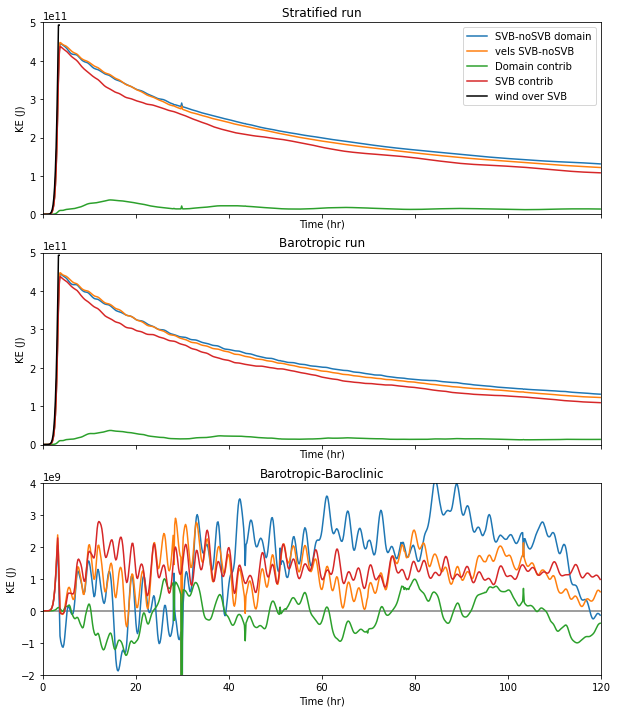

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,12), sharex=True)

ax1.plot((np.arange(len(KE_SVB))*600)/3600,KE_SVB-KE_noSVB, label='SVB-noSVB domain')
ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB, label='vels SVB-noSVB')
ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_onlySVB, label='Domain contrib ')
ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB-KE_onlySVB, label='SVB contrib ')
ax1.plot((np.arange(len(Ewind_onlySVB))*600)/3600,np.cumsum(Ewind_onlySVB*dt), 'k-',label='wind over SVB')
ax1.set_ylabel('KE (J)')
ax1.set_xlabel('Time (hr)')
ax1.set_title('Stratified run')
ax1.set_ylim(0,5E11)

ax2.plot((np.arange(len(KE_SVB))*600)/3600,KE_SVB_baro-KE_noSVB_baro, label='SVB-noSVB domain')
ax2.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB_baro, label='vels SVB-noSVB')
ax2.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_onlySVB_baro, label='Domain contrib ')
ax2.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB_baro-KE_onlySVB_baro, label='SVB contrib ')
ax2.plot((np.arange(len(Ewind_onlySVB))*600)/3600,np.cumsum(Ewind_onlySVB*dt), 'k-',label='wind over SVB')

ax2.set_ylabel('KE (J)')
ax2.set_xlabel('Time (hr)')
ax2.set_title('Barotropic run')
ax2.set_ylim(0,5E11)

ax3.axhline(0,color='0.5')
ax3.plot((np.arange(len(KE_SVB))*600)/3600,(KE_SVB_baro-KE_noSVB_baro)-(KE_SVB-KE_noSVB), label='SVB-noSVB domain')
ax3.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB_baro-KE_maskSVB, label='vels SVB-noSVB')
ax3.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_onlySVB_baro-KE_onlySVB, label='Domain contrib ')
ax3.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB_baro-KE_onlySVB_baro-(KE_maskSVB-KE_onlySVB), label='SVB contrib ')

ax3.set_ylabel('KE (J)')
ax3.set_xlabel('Time (hr)')
ax3.set_title('Barotropic-Baroclinic')
ax3.set_xlim(0,120)
ax3.set_ylim(-0.2E10,0.4E10)

ax1.legend()

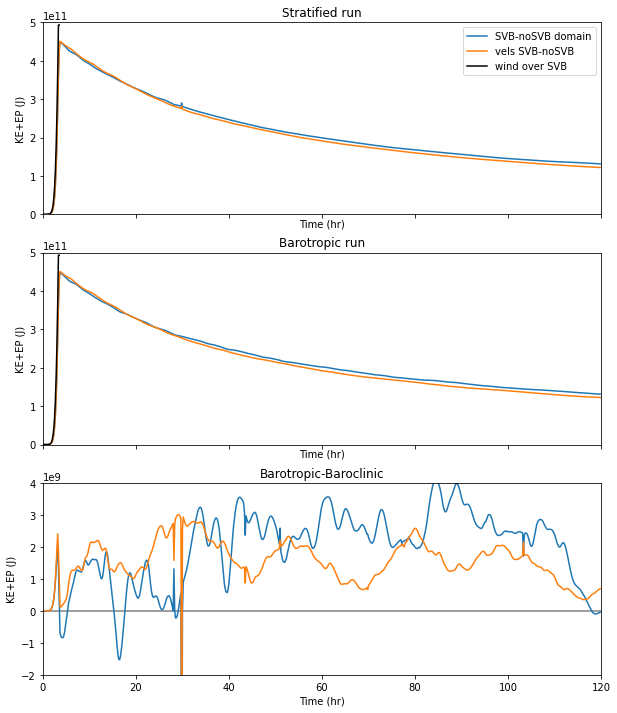

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,12), sharex=True)

ax1.plot((np.arange(len(KE_SVB))*600)/3600,KE_SVB-KE_noSVB+EP_maskSVB, label='SVB-noSVB domain')
ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB+EP_maskSVB, label='vels SVB-noSVB')
ax1.plot((np.arange(len(Ewind_onlySVB))*600)/3600,np.cumsum(Ewind_onlySVB*dt), 'k-',label='wind over SVB')

ax1.set_ylabel('KE+EP (J)')
ax1.set_xlabel('Time (hr)')
ax1.set_title('Stratified run')
ax1.set_ylim(0,5E11)

ax2.plot((np.arange(len(KE_SVB))*600)/3600,KE_SVB_baro-KE_noSVB_baro+EP_maskSVB_baro, label='SVB-noSVB domain')
ax2.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB_baro+EP_maskSVB_baro, label='vels SVB-noSVB')
ax2.plot((np.arange(len(Ewind_onlySVB))*600)/3600,np.cumsum(Ewind_onlySVB*dt), 'k-',label='wind over SVB')

ax2.set_ylabel('KE+EP (J)')
ax2.set_xlabel('Time (hr)')
ax2.set_title('Barotropic run')
ax2.set_ylim(0,5E11)

ax3.axhline(0,color='0.5')
ax3.plot((np.arange(len(KE_SVB))*600)/3600,(KE_SVB_baro-KE_noSVB_baro+EP_maskSVB_baro)-(KE_SVB-KE_noSVB+EP_maskSVB), label='SVB-noSVB domain')
ax3.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_maskSVB_baro+EP_maskSVB_baro)-(KE_maskSVB+EP_maskSVB), label='vels SVB-noSVB')

ax3.set_ylabel('KE+EP (J)')
ax3.set_xlabel('Time (hr)')
ax3.set_title('Barotropic-Baroclinic')
ax3.set_xlim(0,120)
ax3.set_ylim(-0.2E10,0.4E10)

ax1.legend()

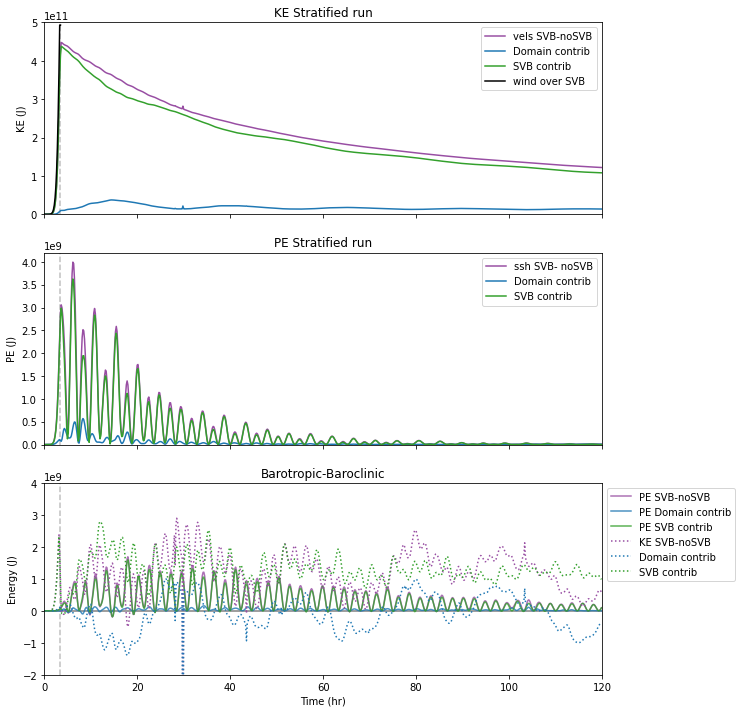

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,12), sharex=True)

for ax in (ax1,ax2,ax3):
    ax.axvline(3.5,color='0.5', linestyle='--', alpha=0.5)
ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB, color='#984ea3', label='vels SVB-noSVB')
ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_onlySVB, color='#1f78b4',label='Domain contrib ')
ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB-KE_onlySVB,color='#33a02c', label='SVB contrib ')
ax1.plot((np.arange(len(Ewind_onlySVB))*600)/3600,np.cumsum(Ewind_onlySVB*dt), 'k-',label='wind over SVB')
ax1.set_ylabel('KE (J)')
ax1.set_title('KE Stratified run')
ax1.set_ylim(0,5E11)

ax2.plot((np.arange(len(EP_SVB))*600)/3600,EP_maskSVB,color='#984ea3', label='ssh SVB- noSVB')
ax2.plot((np.arange(len(EP_onlySVB))*600)/3600,EP_onlySVB, color='#1f78b4', label='Domain contrib')
ax2.plot((np.arange(len(EP_maskSVB))*600)/3600,EP_maskSVB-EP_onlySVB,color='#33a02c', label='SVB contrib')

ax2.set_ylabel('PE (J)')
ax2.set_title('PE Stratified run')
ax2.set_ylim(0,4.2E9)

ax3.axhline(0,color='0.5')
ax3.plot((np.arange(len(EP_SVB))*600)/3600,(EP_maskSVB_baro-EP_maskSVB),
         color='#984ea3', 
         label='PE SVB-noSVB', alpha=0.8)
ax3.plot((np.arange(len(EP_onlySVB))*600)/3600,(EP_onlySVB_baro-EP_onlySVB),
         color='#1f78b4', 
         label='PE Domain contrib', alpha=0.8)
ax3.plot((np.arange(len(EP_maskSVB))*600)/3600,((EP_maskSVB_baro-EP_onlySVB_baro)-(EP_maskSVB-EP_onlySVB)),
         color='#33a02c', label='PE SVB contrib', alpha=0.8)#
#ax3.plot((np.arange(len(KE_SVB))*600)/3600,(KE_SVB_baro-KE_noSVB_baro)-(KE_SVB-KE_noSVB),':',color='orange',
#         label='KE SVB-noSVB domain')
ax3.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_maskSVB_baro-KE_maskSVB),':', 
         color='#984ea3', label='KE SVB-noSVB', alpha=1)
ax3.plot((np.arange(len(KE_onlySVB))*600)/3600,(KE_onlySVB_baro-KE_onlySVB), ':',
         color='#1f78b4', label='Domain contrib ' , alpha=1)
ax3.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_maskSVB_baro-KE_onlySVB_baro-(KE_maskSVB-KE_onlySVB)),
         ':',color='#33a02c', label='SVB contrib ', alpha=1)

ax3.set_ylabel('Energy (J)')
ax3.set_xlabel('Time (hr)')
ax3.set_title('Barotropic-Baroclinic')
ax3.set_xlim(0,120)
ax3.set_ylim(-0.2E10,0.4E10)

ax1.legend()
ax2.legend()
ax3.legend(bbox_to_anchor=(1,1))

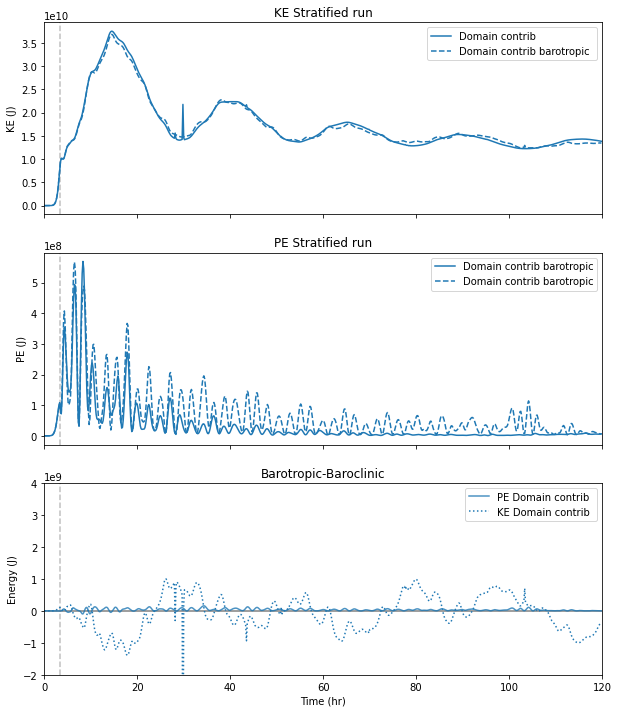

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,12), sharex=True)

for ax in (ax1,ax2,ax3):
    ax.axvline(3.5,color='0.5', linestyle='--', alpha=0.5)
ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_onlySVB, color='#1f78b4',label='Domain contrib ')
ax1.plot((np.arange(len(KE_onlySVB_baro))*600)/3600,KE_onlySVB_baro,'--', color='#1f78b4',label='Domain contrib barotropic ')
ax1.set_ylabel('KE (J)')
ax1.set_title('KE Stratified run')

ax2.plot((np.arange(len(EP_onlySVB))*600)/3600,EP_onlySVB, color='#1f78b4', label='Domain contrib barotropic')
ax2.plot((np.arange(len(EP_onlySVB_baro))*600)/3600,EP_onlySVB_baro,'--', color='#1f78b4', label='Domain contrib barotropic')

ax2.set_ylabel('PE (J)')
ax2.set_title('PE Stratified run')

ax3.axhline(0,color='0.5')
ax3.plot((np.arange(len(EP_onlySVB))*600)/3600,(EP_onlySVB_baro-EP_onlySVB),
         color='#1f78b4', 
         label='PE Domain contrib', alpha=0.8)
ax3.plot((np.arange(len(KE_onlySVB))*600)/3600,(KE_onlySVB_baro-KE_onlySVB), ':',
         color='#1f78b4', label='KE Domain contrib ' , alpha=1)

ax3.set_ylabel('Energy (J)')
ax3.set_xlabel('Time (hr)')
ax3.set_title('Barotropic-Baroclinic')
ax3.set_xlim(0,120)
ax3.set_ylim(-0.2E10,0.4E10)

ax1.legend()
ax2.legend()
ax3.legend(bbox_to_anchor=(1,1))

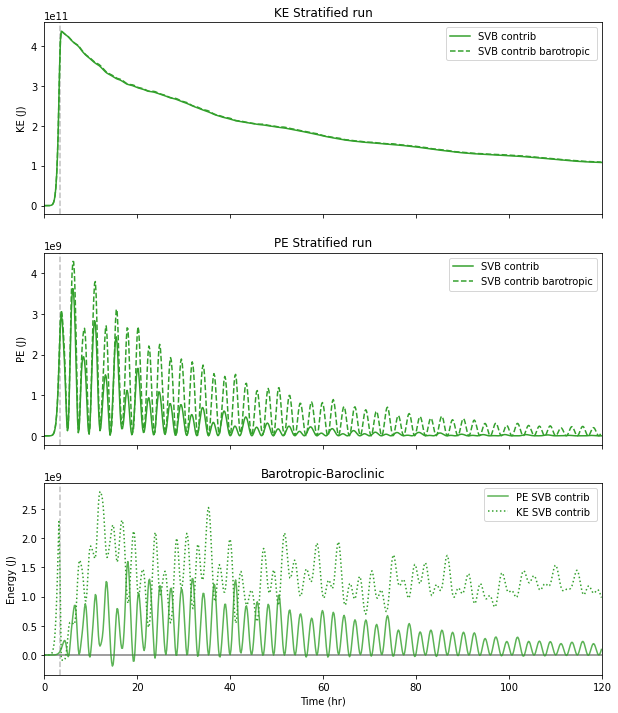

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,12), sharex=True)

for ax in (ax1,ax2,ax3):
    ax.axvline(3.5,color='0.5', linestyle='--', alpha=0.5)
ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB-KE_onlySVB,color='#33a02c', label='SVB contrib ')
ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB_baro-KE_onlySVB_baro,'--',color='#33a02c', label='SVB contrib barotropic ')
ax1.set_ylabel('KE (J)')
ax1.set_title('KE Stratified run')

ax2.plot((np.arange(len(EP_maskSVB))*600)/3600,EP_maskSVB-EP_onlySVB,color='#33a02c', label='SVB contrib')
ax2.plot((np.arange(len(EP_maskSVB))*600)/3600,EP_maskSVB_baro-EP_onlySVB_baro,'--',color='#33a02c', label='SVB contrib barotropic')

ax2.set_ylabel('PE (J)')
ax2.set_title('PE Stratified run')

ax3.axhline(0,color='0.5')
ax3.plot((np.arange(len(EP_maskSVB))*600)/3600,((EP_maskSVB_baro-EP_onlySVB_baro)-(EP_maskSVB-EP_onlySVB)),
         color='#33a02c', label='PE SVB contrib', alpha=0.8)#
ax3.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_maskSVB_baro-KE_onlySVB_baro-(KE_maskSVB-KE_onlySVB)),
         ':',color='#33a02c', label='KE SVB contrib ', alpha=1)
ax3.set_ylabel('Energy (J)')
ax3.set_xlabel('Time (hr)')
ax3.set_title('Barotropic-Baroclinic')
ax3.set_xlim(0,120)

ax1.legend()
ax2.legend()
ax3.legend(bbox_to_anchor=(1,1))

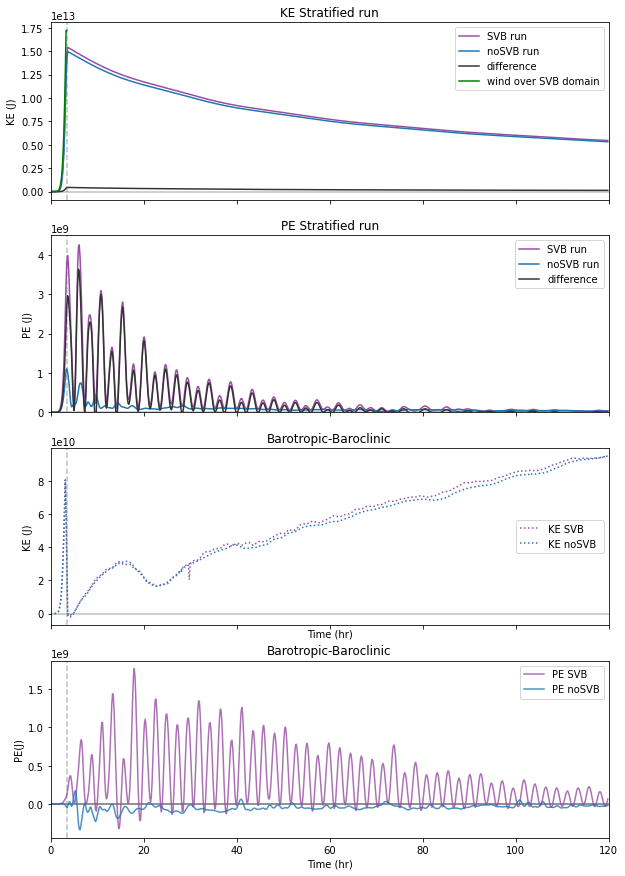

In [45]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(10,15), sharex=True)

for ax in (ax1,ax2,ax3,ax4):
    ax.axvline(3.5,color='0.5', linestyle='--', alpha=0.5)
    ax.axhline(0, color='0.5', alpha=0.5)

ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_SVB, color='#984ea3', label='SVB run')
ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_noSVB, color='#1f78b4',label='noSVB run')
ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_SVB-KE_noSVB, color='0.2',label='difference')
ax1.plot((np.arange(len(Ewind_onlySVB))*600)/3600,np.cumsum(Ewind_SVB*dt), 'g-',label='wind over SVB domain')
ax1.set_ylabel('KE (J)')
ax1.set_title('KE Stratified run')

ax2.plot((np.arange(len(EP_SVB))*600)/3600,EP_SVB,color='#984ea3', label='SVB run')
ax2.plot((np.arange(len(EP_onlySVB))*600)/3600,EP_noSVB, color='#1f78b4', label='noSVB run')
ax2.plot((np.arange(len(EP_onlySVB))*600)/3600,EP_SVB-EP_noSVB, color='0.2', label='difference')
ax2.set_ylabel('PE (J)')
ax2.set_title('PE Stratified run')
ax2.set_ylim(0,4.5E9)

ax3.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_SVB_baro-KE_SVB),':', 
         color='#984ea3', label='KE SVB', alpha=1)
ax3.plot((np.arange(len(KE_onlySVB))*600)/3600,(KE_noSVB_baro-KE_noSVB), ':',
         color='#1f78b4', label='KE noSVB ' , alpha=1)

ax3.set_ylabel('KE (J)')
ax3.set_xlabel('Time (hr)')
ax3.set_title('Barotropic-Baroclinic')
ax3.set_xlim(0,120)

ax4.axhline(0,color='0.5')
ax4.plot((np.arange(len(EP_SVB))*600)/3600,(EP_SVB_baro-EP_SVB),
         color='#984ea3', 
         label='PE SVB', alpha=0.8)
ax4.plot((np.arange(len(EP_onlySVB))*600)/3600,(EP_noSVB_baro-EP_noSVB),
         color='#1f78b4', 
         label='PE noSVB', alpha=0.8)
ax4.set_ylabel('PE(J)')
ax4.set_xlabel('Time (hr)')
ax4.set_title('Barotropic-Baroclinic')
ax4.set_xlim(0,120)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()


baroclinic
mean PE contribution domain 0.25733
mean PE contribution SVB 0.74267
day 1: mean PE contribution domain 0.15983
day 1: mean PE contribution SVB 0.84017
day 5: mean PE contribution domain 0.28171
day 5: mean PE contribution SVB 0.71829
barotropic
mean PE contribution domain 0.16832
mean PE contribution SVB 0.83168
day 1: mean PE contribution domain 0.12480
day 1: mean PE contribution SVB 0.87520
day 5: mean PE contribution domain 0.17920
day 5: mean PE contribution SVB 0.82080


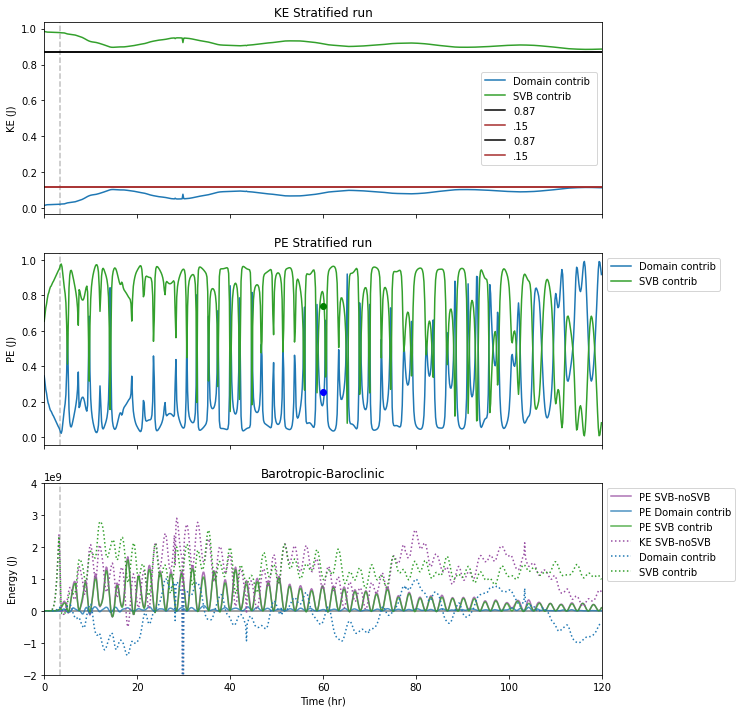

In [29]:
# relative contributions

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,12), sharex=True)

for ax in (ax1,ax2,ax3):
    ax.axvline(3.5,color='0.5', linestyle='--', alpha=0.5)

ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_onlySVB/KE_maskSVB, color='#1f78b4',label='Domain contrib ')
ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_maskSVB-KE_onlySVB)/KE_maskSVB,color='#33a02c', label='SVB contrib ')
ax1.set_ylabel('KE (J)')
ax1.set_title('KE Stratified run')
ax1.axhline(0.87, color='k', label='0.87')
ax1.axhline(0.12, color='brown', label='.15')

ax2.plot((np.arange(len(EP_onlySVB))*600)/3600,EP_onlySVB/EP_maskSVB, color='#1f78b4', label='Domain contrib')
ax2.plot(np.nanmean((np.arange(len(EP_onlySVB))*600)/3600),np.nanmean(EP_onlySVB/EP_maskSVB), 'bo')


ax2.plot((np.arange(len(EP_maskSVB))*600)/3600,(EP_maskSVB-EP_onlySVB)/EP_maskSVB,color='#33a02c', label='SVB contrib')
ax2.plot(np.nanmean((np.arange(len(EP_onlySVB))*600)/3600),np.nanmean((EP_maskSVB-EP_onlySVB)/EP_maskSVB), 'go')

ax2.set_ylabel('PE (J)')
ax2.set_title('PE Stratified run')
ax1.axhline(0.87, color='k', label='0.87')
ax1.axhline(0.12, color='brown', label='.15')

ax3.axhline(0,color='0.5')
ax3.plot((np.arange(len(EP_SVB))*600)/3600,(EP_maskSVB_baro-EP_maskSVB),
         color='#984ea3', 
         label='PE SVB-noSVB', alpha=0.8)
ax3.plot((np.arange(len(EP_onlySVB))*600)/3600,(EP_onlySVB_baro-EP_onlySVB),
         color='#1f78b4', 
         label='PE Domain contrib', alpha=0.8)
ax3.plot((np.arange(len(EP_maskSVB))*600)/3600,((EP_maskSVB_baro-EP_onlySVB_baro)-(EP_maskSVB-EP_onlySVB)),
         color='#33a02c', label='PE SVB contrib', alpha=0.8)#
#ax3.plot((np.arange(len(KE_SVB))*600)/3600,(KE_SVB_baro-KE_noSVB_baro)-(KE_SVB-KE_noSVB),':',color='orange',
#         label='KE SVB-noSVB domain')
ax3.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_maskSVB_baro-KE_maskSVB),':', 
         color='#984ea3', label='KE SVB-noSVB', alpha=1)
ax3.plot((np.arange(len(KE_onlySVB))*600)/3600,(KE_onlySVB_baro-KE_onlySVB), ':',
         color='#1f78b4', label='Domain contrib ' , alpha=1)
ax3.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_maskSVB_baro-KE_onlySVB_baro-(KE_maskSVB-KE_onlySVB)),
         ':',color='#33a02c', label='SVB contrib ', alpha=1)

ax3.set_ylabel('Energy (J)')
ax3.set_xlabel('Time (hr)')
ax3.set_title('Barotropic-Baroclinic')
ax3.set_xlim(0,120)
ax3.set_ylim(-0.2E10,0.4E10)

ax1.legend()
ax2.legend(bbox_to_anchor=(1,1))
ax3.legend(bbox_to_anchor=(1,1))

print('baroclinic')
print('mean PE contribution domain %1.5f' %np.nanmean(EP_onlySVB/EP_maskSVB))
print('mean PE contribution SVB %1.5f' %np.nanmean((EP_maskSVB-EP_onlySVB)/EP_maskSVB))
print('day 1: mean PE contribution domain %1.5f' %np.nanmean(EP_onlySVB[:144]/EP_maskSVB[:144]))
print('day 1: mean PE contribution SVB %1.5f' %np.nanmean((EP_maskSVB[:144]-EP_onlySVB[:144])/EP_maskSVB[:144]))
print('day 5: mean PE contribution domain %1.5f' %np.nanmean(EP_onlySVB[720-(144*4):]/EP_maskSVB[720-(144*4):]))
print('day 5: mean PE contribution SVB %1.5f' %np.nanmean((EP_maskSVB[720-(144*4):]-EP_onlySVB[720-(144*4):])/EP_maskSVB[720-(144*4):]))

print('barotropic')
print('mean PE contribution domain %1.5f' %np.nanmean(EP_onlySVB_baro/EP_maskSVB_baro))
print('mean PE contribution SVB %1.5f' %np.nanmean((EP_maskSVB_baro-EP_onlySVB_baro)/EP_maskSVB_baro))
print('day 1: mean PE contribution domain %1.5f' %np.nanmean(EP_onlySVB_baro[:144]/EP_maskSVB_baro[:144]))
print('day 1: mean PE contribution SVB %1.5f' %np.nanmean((EP_maskSVB_baro[:144]-EP_onlySVB_baro[:144])/EP_maskSVB_baro[:144]))
print('day 5: mean PE contribution domain %1.5f' %np.nanmean(EP_onlySVB_baro[720-(144*4):]/EP_maskSVB_baro[720-(144*4):]))
print('day 5: mean PE contribution SVB %1.5f' %np.nanmean((EP_maskSVB_baro[720-(144*4):]-EP_onlySVB_baro[720-(144*4):])/EP_maskSVB_baro[720-(144*4):]))


Relative contribution of SVB and domain to the PE and KE difference between bay and no bay runs changes in time but to summarize:
* KE in the bay is 100% and decays to 85% by day 5
* KE in the domain is 0% and increases to 15% by day 5.

* PE relative contributions vary wildly due to its oscillatory nature. 
* PE in the bay is between 
* Mean contributions to PE are 26% domain and 74% SVB.
* During the first day these are 16% and 84%, and during day 5, 28% and 72%, respectively.
* Mean contributions to PE in the barotropic case are 17% domain and 83% SVB.
* They go from 12% and 88% during the first day to 18 and 82% during day 5.

### Bay-induced changes

The wind input difference in the run with the bay and without the bay is just the wind that blows over the are of SVB. This matches very nicely with the difference in KE between SVB and noSVB runs:

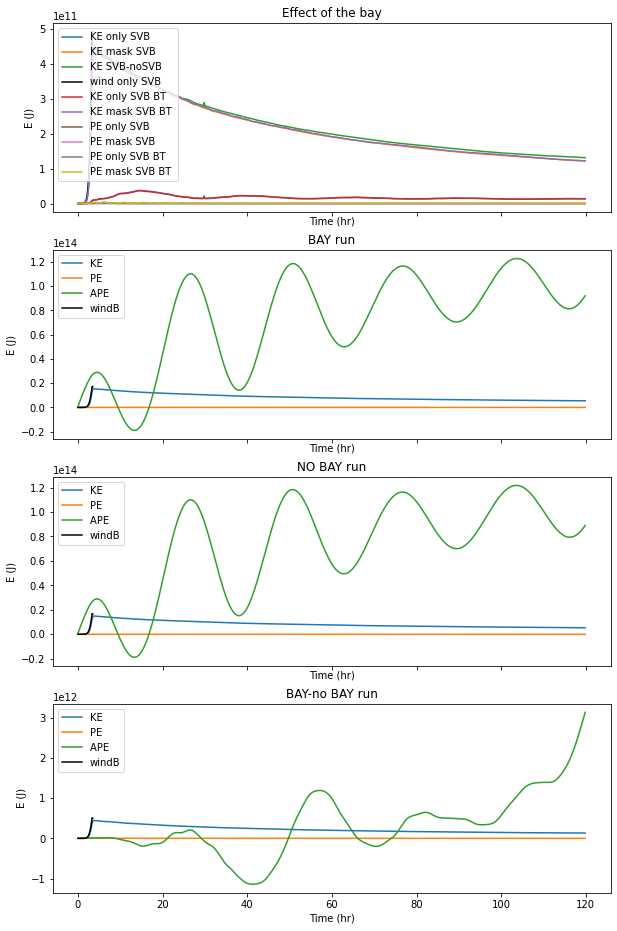

In [30]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(10,16), sharex=True)

ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_onlySVB, label='KE only SVB ')
ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB, label='KE mask SVB ')
ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_SVB-KE_noSVB, label='KE SVB-noSVB ')

ax1.plot((np.arange(len(Ewind_onlySVB))*600)/3600,np.cumsum(Ewind_onlySVB*dt), 'k-',label='wind only SVB')
ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,(KE_onlySVB_baro), label='KE only SVB BT')
ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_maskSVB_baro), label='KE mask SVB BT')

ax1.plot((np.arange(len(EP_onlySVB))*600)/3600,EP_onlySVB, label='PE only SVB ')
ax1.plot((np.arange(len(EP_maskSVB))*600)/3600,EP_maskSVB, label='PE mask SVB ')
ax1.plot((np.arange(len(EP_onlySVB))*600)/3600,EP_onlySVB, label='PE only SVB BT')
ax1.plot((np.arange(len(EP_maskSVB))*600)/3600,EP_maskSVB, label='PE mask SVB BT ')

ax1.set_ylabel('E (J)')
ax1.set_xlabel('Time (hr)')
#ax1.set_ylim(0,)
ax1.set_title('Effect of the bay')
ax1.legend()

ax2.plot((np.arange(len(KE_SVB))*600)/3600,(KE_SVB), label='KE ')
ax2.plot((np.arange(len(EP_SVB))*600)/3600,(EP_SVB), label='PE ')
ax2.plot((np.arange(len(APE_SVB))*600)/3600,(APE_SVB), label='APE ')
ax2.plot((np.arange(len(Ewind_SVB))*600)/3600,np.cumsum(Ewind_SVB*dt), 'k-',label='windB')
ax2.set_ylabel('E (J)')
ax2.set_xlabel('Time (hr)')
ax2.set_title('BAY run')
#ax2.set_ylim(0,1.6E13)
ax2.legend()

ax3.plot((np.arange(len(KE_noSVB))*600)/3600,(KE_noSVB), label='KE ')
ax3.plot((np.arange(len(EP_noSVB))*600)/3600,(EP_noSVB), label='PE ')
ax3.plot((np.arange(len(APE_noSVB))*600)/3600,(APE_noSVB), label='APE ')
ax3.plot((np.arange(len(Ewind_noSVB))*600)/3600,np.cumsum(Ewind_noSVB*dt), 'k-',label='windB')

ax3.set_ylabel('E (J)')
ax3.set_xlabel('Time (hr)')
ax3.set_title('NO BAY run')
ax3.legend()

ax4.plot((np.arange(len(KE_noSVB))*600)/3600,(KE_SVB-KE_noSVB), label='KE ')
ax4.plot((np.arange(len(EP_noSVB))*600)/3600,(EP_SVB-EP_noSVB), label='PE ')
ax4.plot((np.arange(len(APE_noSVB))*600)/3600,(APE_SVB-APE_noSVB), label='APE ')
ax4.plot((np.arange(len(Ewind_noSVB))*600)/3600,np.cumsum((Ewind_SVB-Ewind_noSVB)*dt), 'k-',label='windB')
ax4.set_ylabel('E (J)')
ax4.set_xlabel('Time (hr)')
ax4.set_title('BAY-no BAY run')
ax4.legend()